# Introductory Analysis & Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('Simulated_Dairy_SupplyChain_Data.xlsx')

In [5]:
df.isnull().sum()

Product_ID / Name               0
Order Date / Dispatch Time      0
Delivery Time / Arrival Time    0
Distance                        0
Temperature Log [Degree C]      0
Storage Duration [Hour]         0
Spoilage (%) or Spoiled Flag    0
Transport Mode                  0
Cost of Transportation          0
Warehouse Location              0
Delivery Location               0
Delivery Status                 0
Vendor ID                       0
dtype: int64

In [6]:
df.duplicated().sum() 

np.int64(0)

In [7]:
df.drop(['Vendor ID'], axis = 1, inplace = True)

In [8]:
df['Spoilage_Percentage'] = df['Spoilage (%) or Spoiled Flag'].map({'Yes':1, 'No':0})

In [9]:
df.head(2)

,Product_ID / Name,Order Date / Dispatch Time,Delivery Time / Arrival Time,Distance,Temperature Log [Degree C],Storage Duration [Hour],Spoilage (%) or Spoiled Flag,Transport Mode,Cost of Transportation,Warehouse Location,Delivery Location,Delivery Status,Spoilage_Percentage
0,Hatsun Flavored Milk,2025-07-01 00:00:00,2025-07-01 08:00:00,224,2.71,44,No,Insulated Container,5302,Kolkata,Bangalore,On-time,0
1,Mother Dairy Paneer,2025-07-01 04:00:00,2025-07-01 19:00:00,840,4.74,62,No,Cold Truck,3263,Kolkata,Kolkata,On-time,0


In [10]:
df['Product_Type'] = df['Product_ID / Name'].str.split().str[-1]

In [11]:
df.head(1)

,Product_ID / Name,Order Date / Dispatch Time,Delivery Time / Arrival Time,Distance,Temperature Log [Degree C],Storage Duration [Hour],Spoilage (%) or Spoiled Flag,Transport Mode,Cost of Transportation,Warehouse Location,Delivery Location,Delivery Status,Spoilage_Percentage,Product_Type
0,Hatsun Flavored Milk,2025-07-01,2025-07-01 08:00:00,224,2.71,44,No,Insulated Container,5302,Kolkata,Bangalore,On-time,0,Milk


Text(0.5, 1.0, 'Spoiled vs Not Spoiled Products')

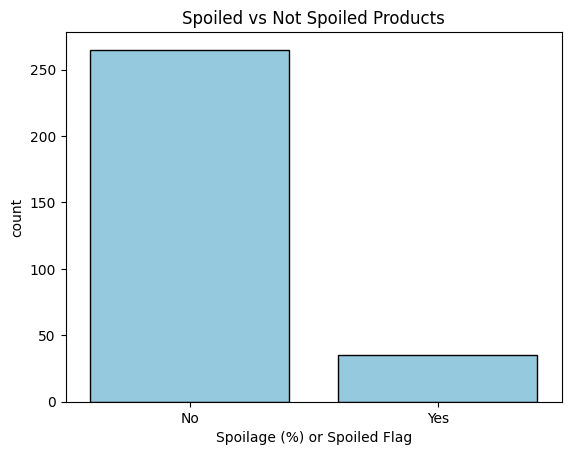

In [12]:
sns.countplot(x="Spoilage (%) or Spoiled Flag", data=df, color = 'skyblue', edgecolor='black')
plt.title("Spoiled vs Not Spoiled Products")

CONCLUSION : 
Only ~ 12% of The Dairy Product in the Data is Spoiled.

# Product Type & Spoilage

In [13]:
df['Product_Type'].unique().tolist()

['Milk', 'Paneer', 'Curd', 'Cheese', 'Ghee']

In [14]:
df.groupby('Product_Type')['Spoilage_Percentage'].sum()

Product_Type
Cheese     8
Curd       3
Ghee       2
Milk      20
Paneer     2
Name: Spoilage_Percentage, dtype: int64

In [15]:
Product_Type_Spoiled = df.groupby('Product_Type')['Spoilage_Percentage'].sum().tolist()

In [16]:
Product_Type_List = df.groupby('Product_Type')['Spoilage_Percentage'].sum().index.tolist()

In [17]:
Product_Type_Total = df.groupby('Product_Type')['Product_ID / Name'].count().tolist()

In [18]:
Product_Type_Total

[34, 36, 31, 163, 36]

In [19]:
Product_Type_NonSpoiled = np.array(Product_Type_Total) - np.array(Product_Type_Spoiled)
Product_Type_NonSpoiled
Product_Type_NonSpoiled = Product_Type_NonSpoiled.tolist()
Product_Type_NonSpoiled

[26, 33, 29, 143, 34]

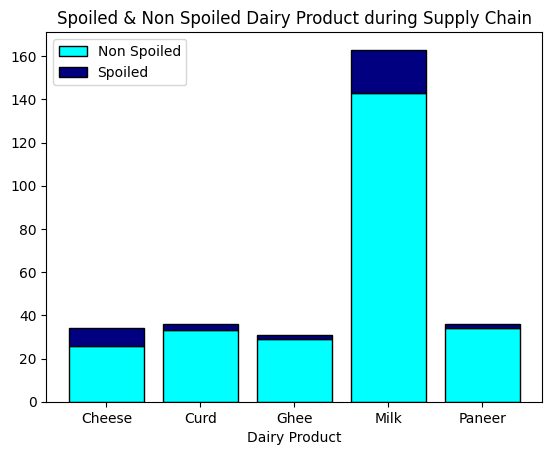

In [20]:
## Spoiled & Non Spoiled Dairy Product during Supply Chain

plt.bar(Product_Type_List, Product_Type_NonSpoiled, label = 'Non Spoiled' , edgecolor = 'black', color = 'aqua' )
plt.bar(Product_Type_List, Product_Type_Spoiled, bottom = Product_Type_NonSpoiled, label = 'Spoiled', edgecolor = 'black', color = 'navy' )
plt.title('Spoiled & Non Spoiled Dairy Product during Supply Chain')
plt.xlabel('Dairy Product')
plt.legend()
plt.show()

In [22]:
print(Product_Type_Total)
print(Product_Type_Spoiled)
print(Product_Type_NonSpoiled)

[34, 36, 31, 163, 36]
[8, 3, 2, 20, 2]
[26, 33, 29, 143, 34]


In [23]:
total = np.array(Product_Type_Total)
spoiled = np.array(Product_Type_Spoiled)
nonspoiled = np.array(Product_Type_NonSpoiled)

spoiled_percentage = (spoiled/total) * 100
spoiled_percentage = spoiled_percentage.tolist()
spoiled_percentage

[23.52941176470588,
 8.333333333333332,
 6.451612903225806,
 12.269938650306749,
 5.555555555555555]

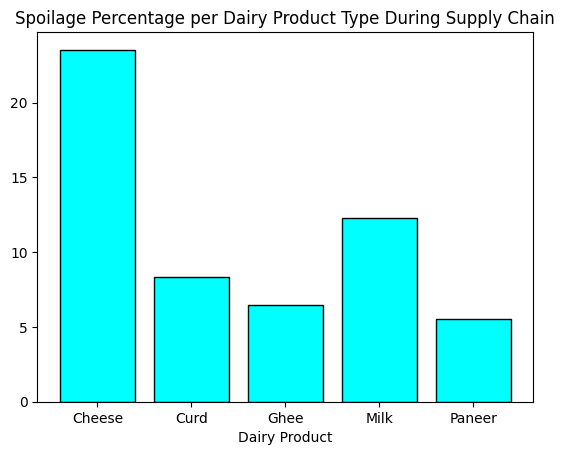

In [24]:
## Spoilage Percentage per Dairy Product Type During Supply Chain

plt.bar(Product_Type_List, spoiled_percentage, color = 'cyan' , edgecolor = 'black' )
plt.title('Spoilage Percentage per Dairy Product Type During Supply Chain')
plt.xlabel('Dairy Product')
# plt.legend()
plt.show()

CONCLUSION :
 During Supply Chain the chances of getting Spoiled of Dairy Products is, Cheese>Milk>Curd>Ghee>Paneer.
 Spoilage Percentage of different types of Dairy Product is,
 Cheese - 23.53% ;
 Curd - 8.33% ;
 Ghee - 6.45% ;
 Milk - 12.27% ;
 Paneer - 5.55%.

# Transport & Spoilage

In [25]:
Transport_Mode = df['Transport Mode'].unique().tolist()
Transport_Mode

['Insulated Container', 'Cold Truck', 'Refrigerated Van']

In [26]:
product_total_vs_transport = pd.crosstab(df['Transport Mode'],df['Product_Type'])
# df['Transport Mode']
# df['Product_Type']
product_total_vs_transport

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Transport Mode,,,,,
Cold Truck,9,10,10,47,18
Insulated Container,12,16,11,60,8
Refrigerated Van,13,10,10,56,10


In [27]:
product_total_vs_transport.loc['Cold Truck'].tolist()

[9, 10, 10, 47, 18]

In [28]:
df['Transport Mode'].value_counts()

Transport Mode
Insulated Container    107
Refrigerated Van        99
Cold Truck              94
Name: count, dtype: int64

In [29]:
df['Transport Mode'].value_counts().tolist()


[107, 99, 94]

In [30]:
df.groupby('Transport Mode')['Spoilage_Percentage'].sum()

Transport Mode
Cold Truck             13
Insulated Container    14
Refrigerated Van        8
Name: Spoilage_Percentage, dtype: int64

In [31]:
df.groupby('Transport Mode')['Spoilage_Percentage'].sum().tolist()

[13, 14, 8]

In [32]:
spoiled_df = df[df['Spoilage_Percentage'] == 1]

product_vs_transport = pd.crosstab(spoiled_df['Transport Mode'],spoiled_df['Product_Type'])

product_vs_transport

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Transport Mode,,,,,
Cold Truck,1,2,1,8,1
Insulated Container,3,1,0,9,1
Refrigerated Van,4,0,1,3,0


In [33]:
cold_truck_total = product_total_vs_transport.loc['Cold Truck'].tolist()
cold_truck_total

[9, 10, 10, 47, 18]

In [34]:
cold_truck_spoiled = product_vs_transport.loc['Cold Truck'].tolist()
print(cold_truck_spoiled)

[1, 2, 1, 8, 1]


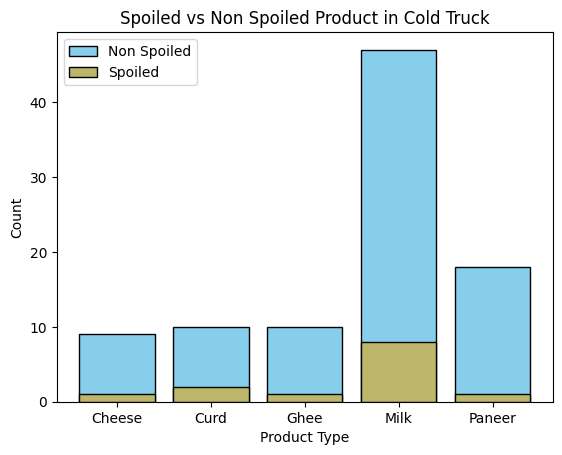

In [35]:
product = ['Cheese',	'Curd',	'Ghee',	'Milk',	'Paneer']

plt.bar(product, cold_truck_total, color = 'skyblue' , edgecolor = 'black', label ='Non Spoiled')
plt.bar(product, cold_truck_spoiled ,color='darkkhaki', edgecolor = 'black',label = 'Spoiled' )
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Spoiled vs Non Spoiled Product in Cold Truck')
plt.legend()
plt.show()

In [36]:
cold_truck_percent_spoiled = (np.array(cold_truck_spoiled)/np.array(cold_truck_total))*100
cold_truck_percent_spoiled

array([11.11111111, 20.        , 10.        , 17.0212766 ,  5.55555556])

In [37]:
refrigerated_van_total = product_total_vs_transport.loc['Refrigerated Van'].tolist()
refrigerated_van_total

[13, 10, 10, 56, 10]

In [38]:
refrigerated_van_spoiled = product_vs_transport.loc['Refrigerated Van'].tolist()
refrigerated_van_spoiled

[4, 0, 1, 3, 0]

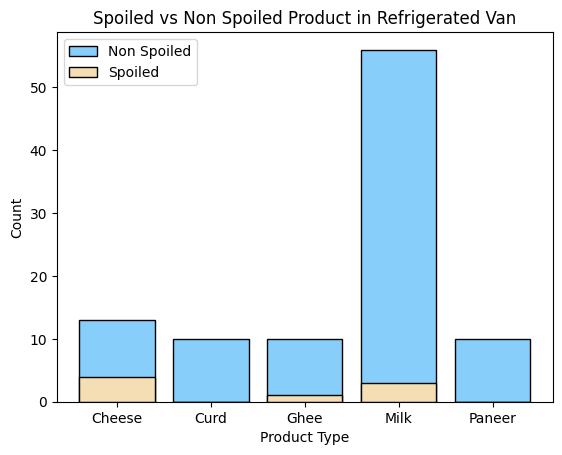

In [39]:
product = ['Cheese',	'Curd',	'Ghee',	'Milk',	'Paneer']

plt.bar(product, refrigerated_van_total, color = 'lightskyblue' , edgecolor = 'black', label ='Non Spoiled')
plt.bar(product, refrigerated_van_spoiled ,color='wheat', edgecolor = 'black',label = 'Spoiled' )
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Spoiled vs Non Spoiled Product in Refrigerated Van')
plt.legend()
plt.show()

In [40]:
insulated_container_total = product_total_vs_transport.loc['Insulated Container'].tolist()
insulated_container_total

[12, 16, 11, 60, 8]

In [41]:
insulated_container_spoiled = product_vs_transport.loc['Insulated Container'].tolist()
insulated_container_spoiled

[3, 1, 0, 9, 1]

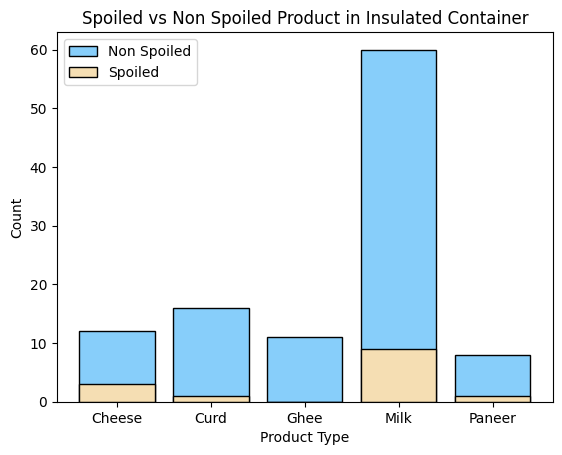

In [42]:
product = ['Cheese',	'Curd',	'Ghee',	'Milk',	'Paneer']

plt.bar(product, insulated_container_total, color = 'lightskyblue' , edgecolor = 'black', label ='Non Spoiled')
plt.bar(product, insulated_container_spoiled ,color='wheat', edgecolor = 'black',label = 'Spoiled' )
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Spoiled vs Non Spoiled Product in Insulated Container')
plt.legend()
plt.show()

In [43]:
refrigerated_van_percent_spoiled = (np.array(refrigerated_van_spoiled)/np.array(refrigerated_van_total))*100
refrigerated_van_percent_spoiled

array([30.76923077,  0.        , 10.        ,  5.35714286,  0.        ])

In [44]:
cold_truck_percent_spoiled

array([11.11111111, 20.        , 10.        , 17.0212766 ,  5.55555556])

In [45]:
insulated_container_percent_spoiled = (np.array(insulated_container_spoiled)/np.array(insulated_container_total))*100
insulated_container_percent_spoiled

array([25.  ,  6.25,  0.  , 15.  , 12.5 ])

Text(0.5, 1.0, 'Spoiled Product Percenttage in Cold Truck Transport Mode')

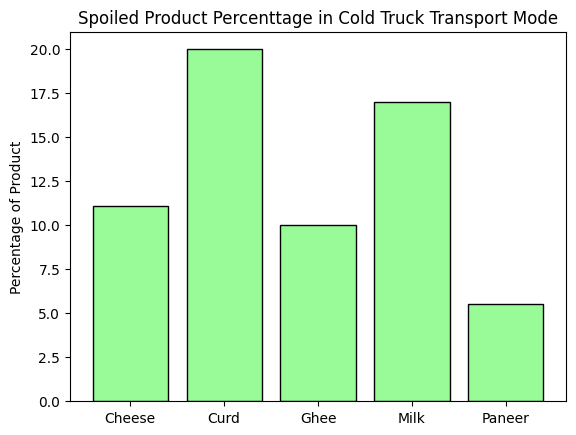

In [46]:
product = ['Cheese',	'Curd',	'Ghee',	'Milk',	'Paneer']

plt.bar(product,cold_truck_percent_spoiled,color = 'palegreen', edgecolor='black')
plt.ylabel('Percentage of Product')
plt.title('Spoiled Product Percenttage in Cold Truck Transport Mode')

Text(0.5, 1.0, 'Spoiled Product Percenttage in Refrigerated Van Transport Mode')

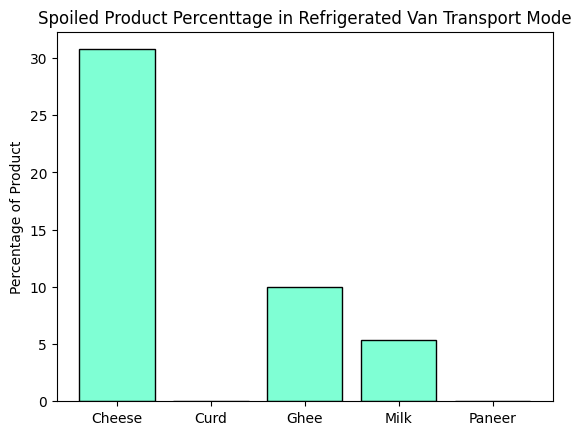

In [47]:
product = ['Cheese',	'Curd',	'Ghee',	'Milk',	'Paneer']

plt.bar(product,refrigerated_van_percent_spoiled,color = 'aquamarine', edgecolor='black')
plt.ylabel('Percentage of Product')
plt.title('Spoiled Product Percenttage in Refrigerated Van Transport Mode')

Text(0.5, 1.0, 'Spoiled Product Percenttage in Insulated Container Transport Mode')

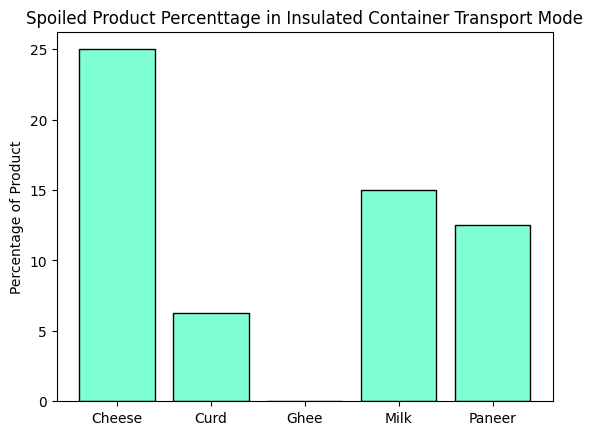

In [48]:
product = ['Cheese',	'Curd',	'Ghee',	'Milk',	'Paneer']

plt.bar(product,insulated_container_percent_spoiled,color = 'aquamarine', edgecolor='black')
plt.ylabel('Percentage of Product')
plt.title('Spoiled Product Percenttage in Insulated Container Transport Mode')

CONCLUSION 2: 
The Best Mode of Transport for,
1. Chesse is Cold Truck
2. Curd is Refrigerated Van
3. Ghee is Insulated Container
4. Milk is Refrigerated Van
5. Paneer is Refrigerated Van.

# Distance & Spoilage

In [49]:
distance_list = df['Distance'].tolist()
print(min(distance_list))
print(max(distance_list))

15
1198


<Axes: >

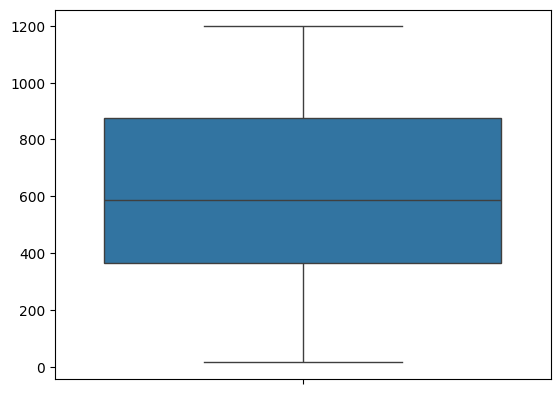

In [50]:
sns.boxplot(distance_list)  

CONCLUSION:
No Outlier is Present in Distance Travelled During Supply Chain.
Ensuring data consistency and reliability for further analysis.

Text(0, 0.5, 'Product count')

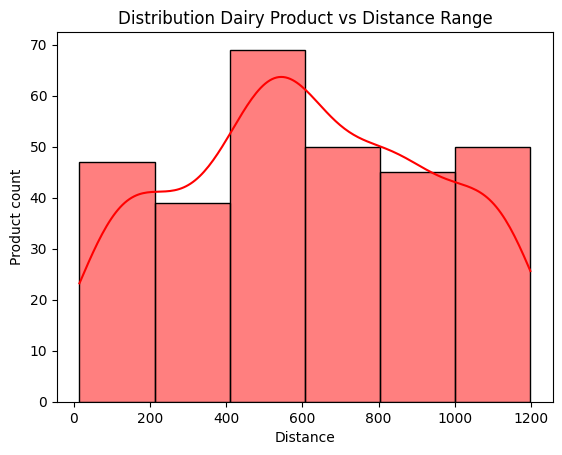

In [51]:
sns.histplot(data = distance_list,bins=6,edgecolor = 'black', color = 'Red', kde = True)
plt.title('Distribution Dairy Product vs Distance Range')
plt.xlabel('Distance')
plt.ylabel('Product count')

In [52]:
# Example distance bins (you can adjust as per your data)
bins = [0, 200, 400, 600, 800, 1000, 1200]  
labels = ["0-200", "200-400", "400-600", "600-800", "800-1000", "1000-1200"]

# Create a new column for distance range
df['Distance_Range'] = pd.cut(df["Distance"], bins=bins, labels=labels, right=False)
df['Distance_Range']

0        200-400
1       800-1000
2          0-200
3        200-400
4      1000-1200
         ...    
295      400-600
296      400-600
297      400-600
298        0-200
299     800-1000
Name: Distance_Range, Length: 300, dtype: category
Categories (6, object): ['0-200' < '200-400' < '400-600' < '600-800' < '800-1000' < '1000-1200']

In [53]:
# Grouped by distance range and calculate spoilage %
spoilage_summary = df.groupby("Distance_Range")["Spoilage_Percentage"].mean() * 100
print(spoilage_summary)

Distance_Range
0-200         9.090909
200-400       9.756098
400-600      16.176471
600-800       9.615385
800-1000     15.555556
1000-1200     8.000000
Name: Spoilage_Percentage, dtype: float64


C:\Users\Samunnata\AppData\Local\Temp\ipykernel_5980\2899375490.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spoilage_summary = df.groupby("Distance_Range")["Spoilage_Percentage"].mean() * 100


Text(0.5, 1.0, 'Spoilage Percentage vs Distance Range')

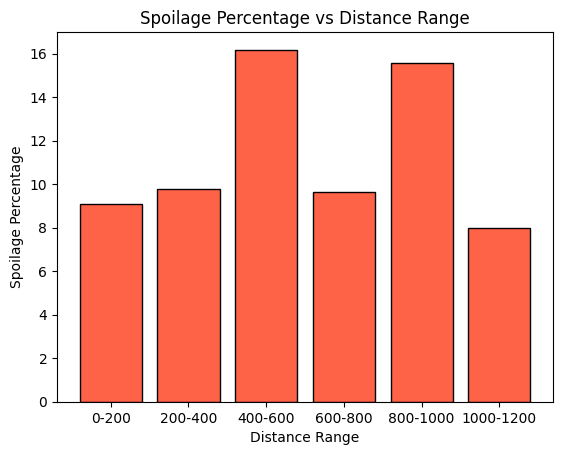

In [54]:
plt.bar((spoilage_summary.index.tolist()),(spoilage_summary.tolist()), color = 'tomato', edgecolor = 'black')
plt.xlabel('Distance Range')
plt.ylabel('Spoilage Percentage')
plt.title('Spoilage Percentage vs Distance Range')

CONCLUSION:
Spoilage Percentage do not directly depend on Distance Range.

In [55]:
# Define bins (distance intervals) and labels
bins = [0, 200, 400, 600, 800,1000, 1200]  
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000','1000-1200']

# Create Distance_Range column
df['Distance_Range'] = pd.cut(df['Distance'], bins=bins, labels=labels, right=False)

# Check the new column
df[['Distance', 'Distance_Range']].head()

,Distance,Distance_Range
0,224,200-400
1,840,800-1000
2,20,0-200
3,382,200-400
4,1101,1000-1200


In [56]:
#Total Product Transported via Different Transport Mode vs Distance Range
pd.crosstab(df['Distance_Range'],df['Transport Mode'])

Transport Mode,Cold Truck,Insulated Container,Refrigerated Van
Distance_Range,,,
0-200,17,13,14
200-400,9,18,14
400-600,18,28,22
600-800,19,17,16
800-1000,14,18,13
1000-1200,17,13,20


In [57]:
spoiled_df = df[df['Spoilage_Percentage']==1]
distance_vs_transport_spoilage = pd.crosstab(spoiled_df['Distance_Range'],spoiled_df['Transport Mode'])
distance_vs_transport_spoilage

Transport Mode,Cold Truck,Insulated Container,Refrigerated Van
Distance_Range,,,
0-200,2,1,1
200-400,3,1,0
400-600,3,6,2
600-800,1,2,2
800-1000,3,4,0
1000-1200,1,0,3


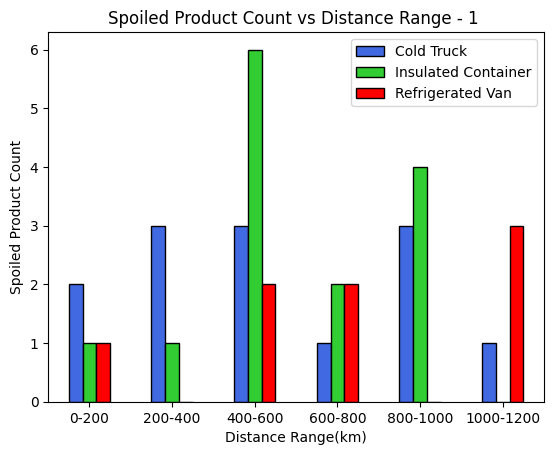

In [58]:
distance_vs_transport_spoilage.plot(kind='bar',edgecolor = 'black', color = ['royalblue','limegreen','red'])
plt.xticks(rotation=0)
plt.xlabel('Distance Range(km)')
plt.ylabel('Spoiled Product Count')
plt.title('Spoiled Product Count vs Distance Range - 1 ')
plt.legend()
plt.show()

In [59]:
spoiled_df = df[df['Spoilage_Percentage']==1]
distance_vs_product_spoilage = pd.crosstab(spoiled_df['Distance_Range'],spoiled_df['Product_Type'])
distance_vs_product_spoilage

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Distance_Range,,,,,
0-200,2,0,0,2,0
200-400,0,1,1,2,0
400-600,1,1,1,8,0
600-800,2,0,0,3,0
800-1000,0,1,0,4,2
1000-1200,3,0,0,1,0


In [60]:
pd.crosstab(df['Distance_Range'],df['Product_Type'])

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Distance_Range,,,,,
0-200,7,3,8,24,2
200-400,3,5,7,22,4
400-600,5,10,12,35,6
600-800,9,4,2,28,9
800-1000,2,8,2,27,6
1000-1200,8,6,0,27,9


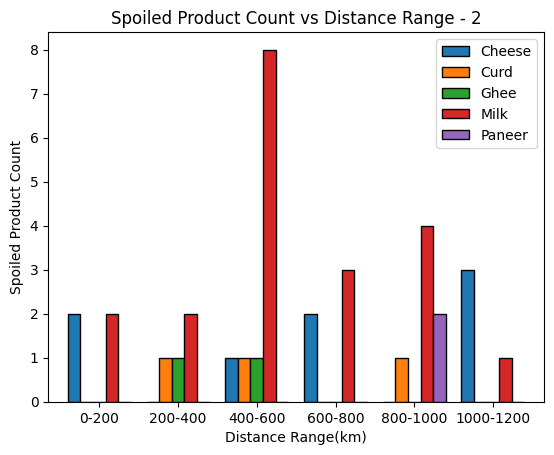

In [61]:
distance_vs_product_spoilage.plot(kind='bar', width= 0.8, edgecolor = 'black')
plt.xticks(rotation=0)
plt.xlabel('Distance Range(km)')
plt.ylabel('Spoiled Product Count')
plt.title('Spoiled Product Count vs Distance Range - 2')
plt.legend()
plt.show()

CONCLUSION:
From the above two Bar Graph, No realtionship was found,
Between Distance Range , Spoilage and Product Type 
and Between Distance Range, Spoilage and Transport Mode.

C:\Users\Samunnata\AppData\Local\Temp\ipykernel_5980\2776897405.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_1 = df.pivot_table(values="Spoilage_Percentage",


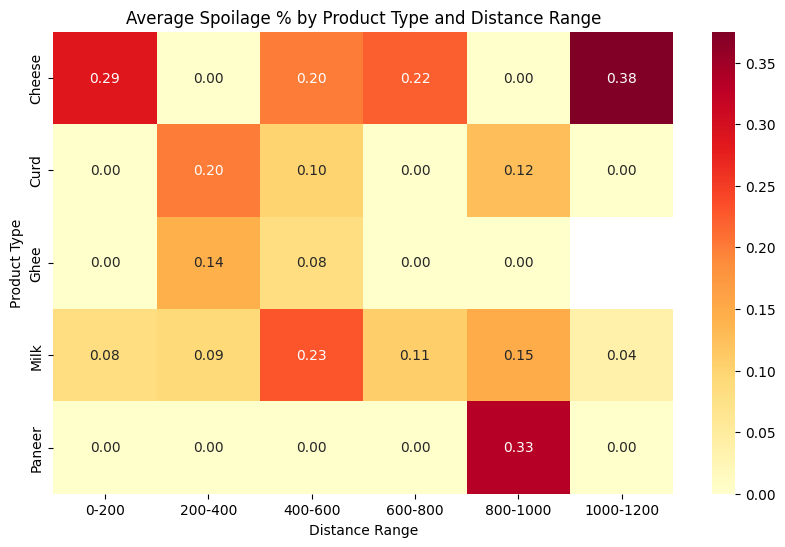

In [62]:
pivot_table_1 = df.pivot_table(values="Spoilage_Percentage", 
                             index="Product_Type", 
                             columns="Distance_Range", 
                             aggfunc="mean")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table_1, annot=True ,cmap="YlOrRd", fmt=".2f")
plt.title("Average Spoilage % by Product Type and Distance Range")
plt.ylabel('Product Type')
plt.xlabel('Distance Range')
plt.show()

CONCLUSION:
No Direct Relationship could be found between Product Type, Distance and Spoilage of Product from the Heat Map.

# Storage Temperature & Spoilage

In [63]:
temperature_list = df['Temperature Log [Degree C]'].tolist()

In [64]:
min(temperature_list)

1.53

In [65]:
max(temperature_list)

9.99

In [66]:
bins = [0,1,2,3,4,5,6,7,8,9,10]
labels = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10']

df['Temperature_Range'] = pd.cut(df['Temperature Log [Degree C]'],bins = bins, labels = labels, right = False)

In [67]:
pd.crosstab(df['Temperature_Range'],df['Product_Type'])

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Temperature_Range,,,,,
1-2,4,1,0,12,1
2-3,4,5,4,24,4
3-4,4,5,3,25,5
4-5,3,4,3,17,3
5-6,3,3,4,17,3
6-7,9,5,5,15,4
7-8,2,7,5,18,8
8-9,2,5,2,19,4
9-10,3,1,5,16,4


In [68]:
pivot_table_4 = df.pivot_table(
    values = 'Spoilage_Percentage',
    index = 'Product_Type',
    columns = 'Temperature_Range',
    aggfunc = 'mean',
    margins= True
)
# pivot_table_4

C:\Users\Samunnata\AppData\Local\Temp\ipykernel_5980\466731008.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_4 = df.pivot_table(


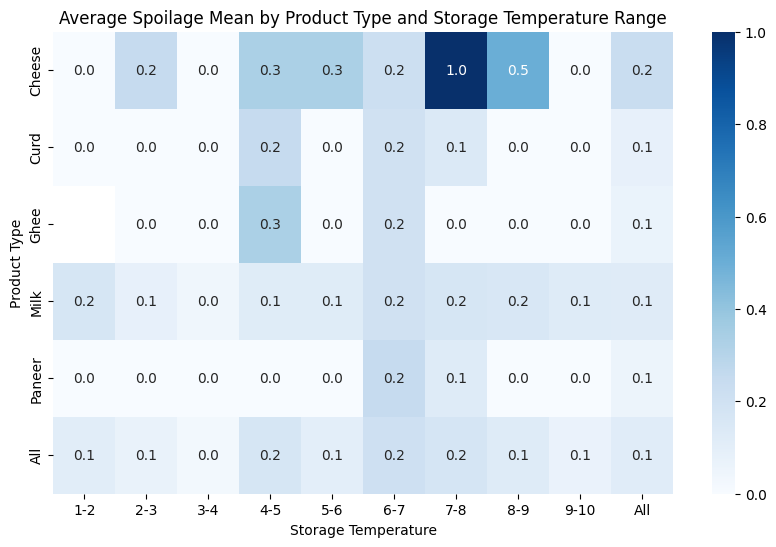

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table_4 ,annot = True ,cmap="Blues", fmt=".1f")
plt.title("Average Spoilage Mean by Product Type and Storage Temperature Range")
plt.ylabel('Product Type')
plt.xlabel('Storage Temperature')
plt.show()

Text(0.5, 1.0, 'Spoiled Product Count vs Storage Temperature ')

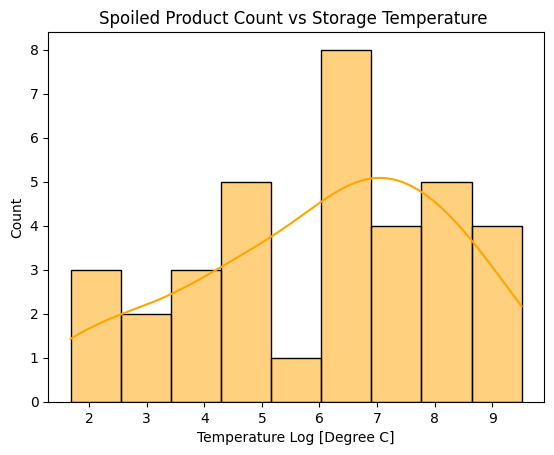

In [70]:
df_spoilage = df[df['Spoilage_Percentage']==1]
sns.histplot(df_spoilage['Temperature Log [Degree C]'],bins = 9, kde = True, color = 'orange')
plt.title('Spoiled Product Count vs Storage Temperature ')

# Storage Duration, Product Type & Spoilage

Text(0, 0.5, 'Storage Duration')

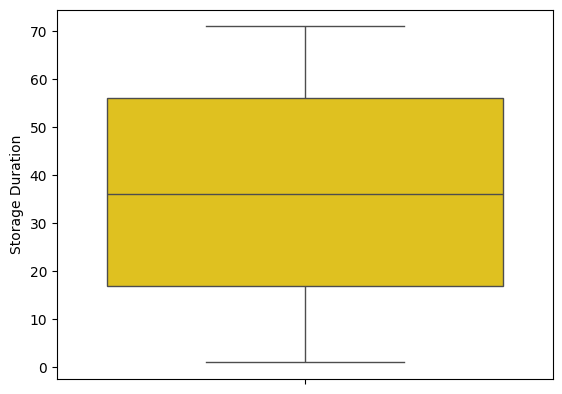

In [71]:
sns.boxplot(df['Storage Duration [Hour]'].tolist(), color = 'gold')
# sns.y('Storage Duration')
plt.ylabel('Storage Duration')

CONCLUSION:
No Outlier is Present in the Storage Duration of Dairy products, During Supply Chain. 
Ensuring data consistency and reliability for further analysis.

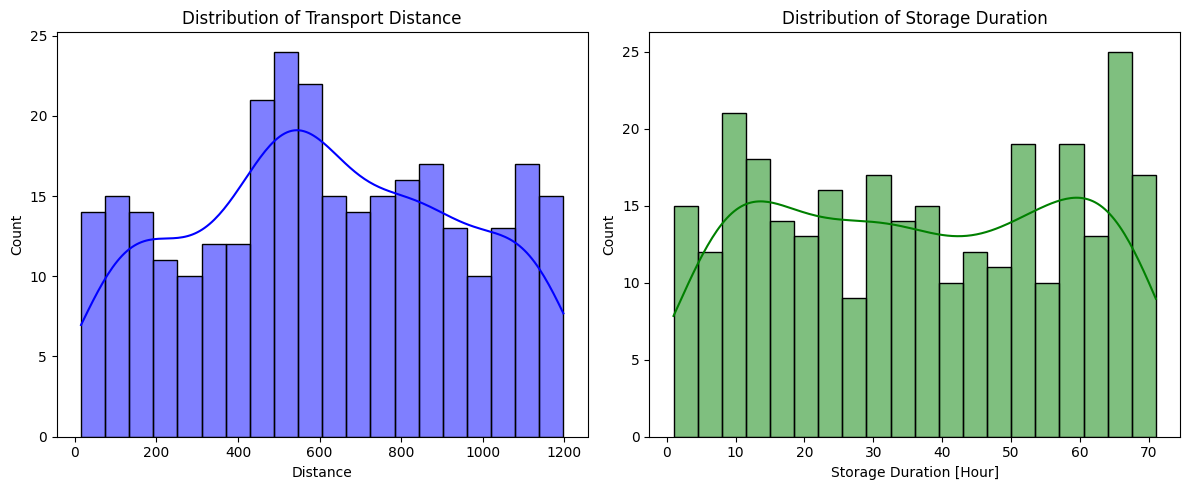

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Distance'], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Transport Distance")

sns.histplot(df['Storage Duration [Hour]'], bins=20, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Storage Duration")

plt.tight_layout()
plt.show()


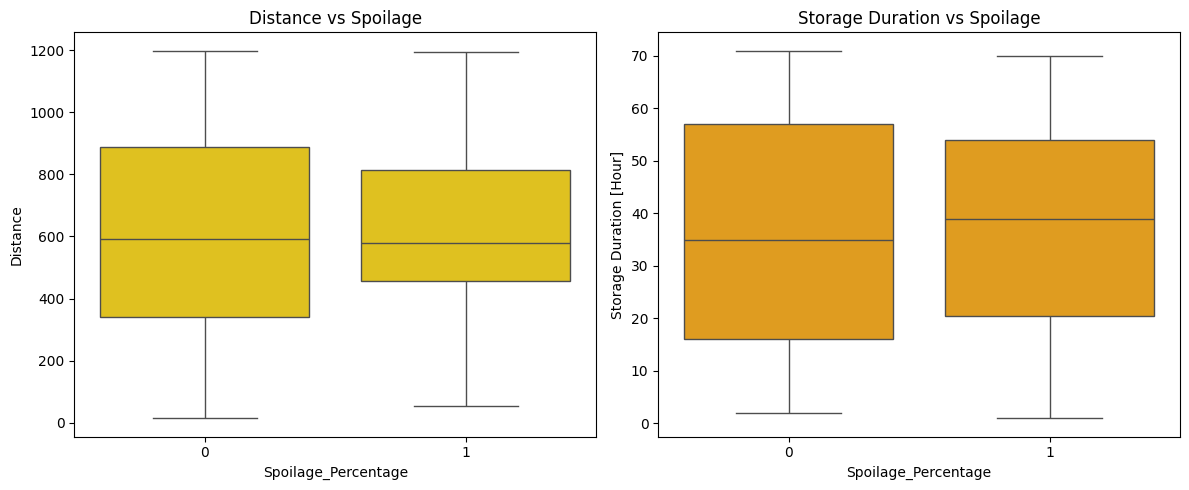

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="Spoilage_Percentage", y="Distance", data=df, ax=axes[0], color = 'gold')
axes[0].set_title("Distance vs Spoilage")

sns.boxplot(x="Spoilage_Percentage", y= 'Storage Duration [Hour]', data=df, ax=axes[1], color = 'orange')
axes[1].set_title("Storage Duration vs Spoilage")

plt.tight_layout()
plt.show()


In [74]:
bins = [0,10,20,30,40,50,60,70,80]
labels = ['0-10','1-20','20-30','30-40','40-50','50-60','60-70','70-80']
df['Storage Duration Range'] = pd.cut(df['Storage Duration [Hour]'],bins = bins, labels = labels, right = False)

In [75]:
pd.crosstab(df['Storage Duration Range'],df['Product_Type'])

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Storage Duration Range,,,,,
0-10,3,5,3,22,4
1-20,4,10,3,23,5
20-30,10,3,2,23,2
30-40,3,3,6,22,8
40-50,4,5,1,21,2
50-60,5,4,5,25,5
60-70,5,6,10,23,8
70-80,0,0,1,4,2


In [76]:
spoiled_df = df[df['Spoilage_Percentage']==1]
pd.crosstab(spoiled_df['Storage Duration Range'],spoiled_df['Product_Type'])

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Storage Duration Range,,,,,
0-10,0,1,1,2,0
1-20,1,0,0,4,0
20-30,1,0,0,3,0
30-40,2,0,0,3,0
40-50,2,0,0,2,0
50-60,1,2,0,4,1
60-70,1,0,1,1,1
70-80,0,0,0,1,0


CONCLUSION : 
No Direct Relationship could be found between Storage Duration during Supply Chain and The Spoilage of Different Products.

C:\Users\Samunnata\AppData\Local\Temp\ipykernel_5980\895729695.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_2 = df.pivot_table(values="Spoilage_Percentage",


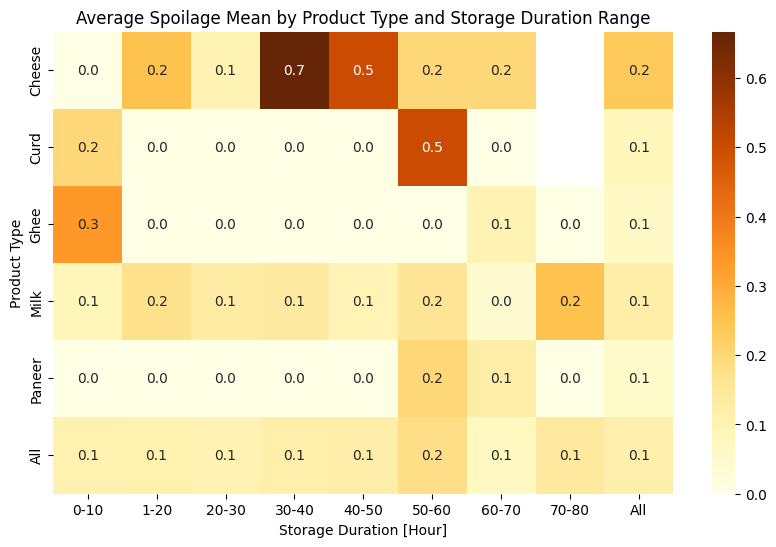

In [77]:
pivot_table_2 = df.pivot_table(values="Spoilage_Percentage", 
                             index="Product_Type", 
                             columns="Storage Duration Range", 
                             aggfunc="mean",
                             margins = True)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table_2 ,annot = True ,cmap="YlOrBr", fmt=".1f")
plt.title("Average Spoilage Mean by Product Type and Storage Duration Range")
plt.ylabel('Product Type')
plt.xlabel('Storage Duration [Hour]')
plt.show()

CONCLUSION : 
From The Heat Map NO Direct Relationship could be found between Storage Duration, Product Type and The Spoilage during Supply Chain.

# Delivery Status & Spoilage

In [78]:
d_vs_p = pd.crosstab(df['Delivery Status'],df['Product_Type'])
d_vs_p

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Delivery Status,,,,,
Late,4,9,7,40,6
On-time,30,27,24,123,30


<Axes: xlabel='Delivery Status', ylabel='count'>

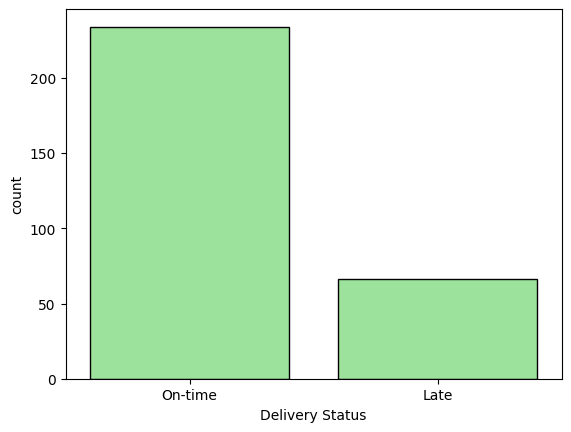

In [79]:
sns.countplot(x = 'Delivery Status', data = df, color = 'Lightgreen', edgecolor = 'black')

CONCLUSION: Only 22% of The Total Dairy Product are Supplied Late.

In [80]:
df_spoilage = df[df['Spoilage_Percentage']==1]
pd.crosstab(df_spoilage['Delivery Status'], df_spoilage['Product_Type'])

Product_Type,Cheese,Curd,Ghee,Milk,Paneer
Delivery Status,,,,,
Late,0,1,1,5,0
On-time,8,2,1,15,2


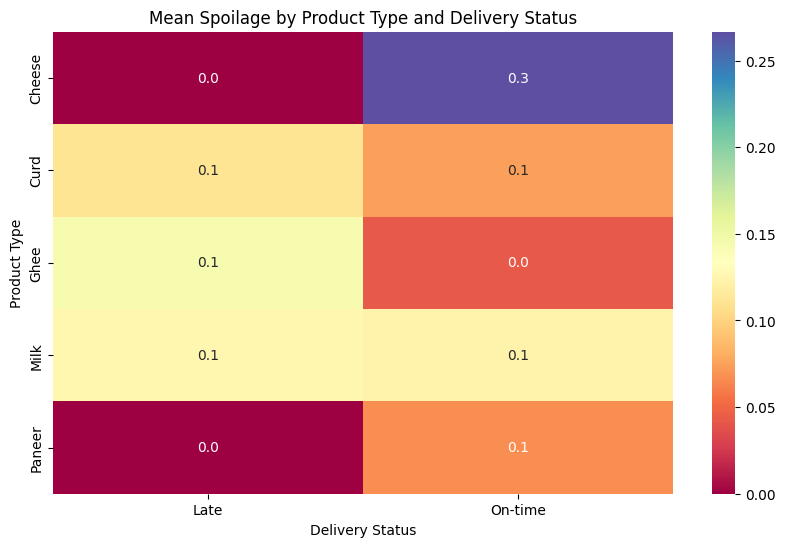

In [81]:
pivot_table_3 = df.pivot_table(values="Spoilage_Percentage", 
                             index="Product_Type", 
                             columns="Delivery Status", 
                             aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table_3,annot = True ,cmap="Spectral", fmt=".1f")
plt.title("Mean Spoilage by Product Type and Delivery Status")
plt.ylabel('Product Type')
plt.xlabel('Delivery Status')
plt.show()

CONCLUSION : No Relationship can be found from the Heat Map between Delivery Status and Spoilage of Different Dairy Product Type during Supply Chain.